In [3]:
import keras
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("D:/CHROME DOWNLOADS/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
X=df.iloc[:, 3:13]
y=df.iloc[:, 13]

In [18]:
geography= pd.get_dummies(X["Geography"], drop_first=True)
gender= pd.get_dummies(X["Gender"], drop_first= True)

In [19]:
X= pd.concat([X, geography, gender], axis=1)

In [21]:
X= X.drop(['Geography',"Gender"], axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import RobustScaler
Rs= RobustScaler()
X_train= Rs.fit_transform(X_train)
X_test= Rs.transform(X_test)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [34]:
model= Sequential()
model.add(Dense(units = 7 , kernel_initializer= "he_uniform", activation="relu", input_dim=11))
model.add(Dense(units = 7 , kernel_initializer= "he_uniform", activation="relu"))
model.add(Dense(units = 1 , kernel_initializer= "glorot_uniform", activation="sigmoid"))
model.compile(optimizer="Adamax", loss= "binary_crossentropy", metrics= ["accuracy"])


In [40]:
model_history= model.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs= 100 )

Epoch 1/100
560/560 [==============================] - 16s 2ms/step - loss: 0.6540 - accuracy: 0.6469 - val_loss: 0.5598 - val_accuracy: 0.7943
Epoch 2/100
560/560 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7878 - val_loss: 0.5137 - val_accuracy: 0.7943
Epoch 3/100
560/560 [==============================] - 1s 1ms/step - loss: 0.5115 - accuracy: 0.7868 - val_loss: 0.4865 - val_accuracy: 0.7950
Epoch 4/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4873 - accuracy: 0.7924 - val_loss: 0.4680 - val_accuracy: 0.8007
Epoch 5/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4598 - accuracy: 0.8045 - val_loss: 0.4564 - val_accuracy: 0.7957
Epoch 6/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4599 - accuracy: 0.7926 - val_loss: 0.4490 - val_accuracy: 0.7979
Epoch 7/100
560/560 [==============================] - 1s 1ms/step - loss: 0.4599 - accuracy: 0.7912 - val_loss: 0.4439 - val_accuracy: 0.801

Epoch 58/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8370 - val_loss: 0.4040 - val_accuracy: 0.8321
Epoch 59/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3916 - accuracy: 0.8391 - val_loss: 0.4028 - val_accuracy: 0.8307
Epoch 60/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8330 - val_loss: 0.4028 - val_accuracy: 0.8329
Epoch 61/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8358 - val_loss: 0.4026 - val_accuracy: 0.8350
Epoch 62/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3849 - accuracy: 0.8401 - val_loss: 0.4011 - val_accuracy: 0.8336
Epoch 63/100
560/560 [==============================] - 1s 1ms/step - loss: 0.3971 - accuracy: 0.8354 - val_loss: 0.4006 - val_accuracy: 0.8336
Epoch 64/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3848 - accuracy: 0.8371 - val_loss: 0.3989 - val_accuracy:

In [42]:
print( model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


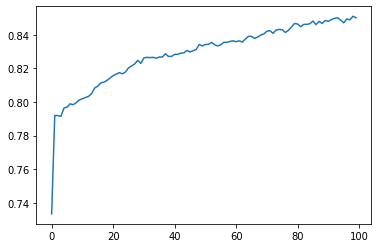

In [44]:
plt.plot(model_history.history['accuracy'])

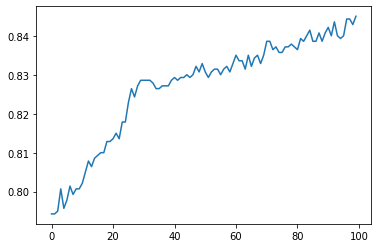

In [45]:
plt.plot(model_history.history['val_accuracy'])

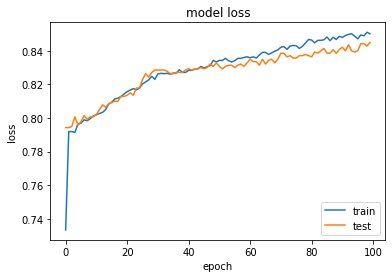

In [48]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'], loc='lower right')
plt.show()

In [49]:
y_pred= model.predict(X_test)
y_pred= (y_pred>0.5)

In [51]:
from sklearn.metrics import confusion_matrix
cmat= confusion_matrix(y_test, y_pred)
cmat

array([[2351,   65],
       [ 345,  239]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
score

0.8633333333333333